In [1]:
def load_data_general(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
        
    # Directly convert to DataFrame if the file is a list of records
    if isinstance(data, list):
        return pd.DataFrame(data)
    # Try to convert using common keys found in the JSON file
    elif 'songs' in data:
        return pd.json_normalize(data['songs'])
    elif 'tracks' in data:
        return pd.json_normalize(data['tracks']['items'])
    else:
        # If the structure is unknown, attempt to find a list in the values and convert it
        for key, value in data.items():
            if isinstance(value, list):
                return pd.DataFrame(value)
        # Return an empty DataFrame as a fallback
        return pd.DataFrame()

# Attempt to load both datasets again with the revised function
vetting_playlist_df = load_data_general('Vetting_Playlist.json')
songs_df = load_data_general('songs_0-999.json')

# Quick check to ensure the data frames are not empty
if not vetting_playlist_df.empty and not songs_df.empty:
    print("Both DataFrames loaded successfully. Proceeding with analysis...")
    # You can proceed with the analysis part here
else:
    if vetting_playlist_df.empty:
        print("Failed to load 'Vetting_Playlist.json' or the file is empty.")
    if songs_df.empty:
        print("Failed to load 'songs_0-999.json' or the file is empty.")


NameError: name 'json' is not defined

In [2]:
import json
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

def load_data_general(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
        
    if isinstance(data, list):
        return pd.DataFrame(data)
    elif 'songs' in data:
        return pd.json_normalize(data['songs'])
    elif 'tracks' in data:
        return pd.json_normalize(data['tracks']['items'])
    else:
        for key, value in data.items():
            if isinstance(value, list):
                return pd.DataFrame(value)
        return pd.DataFrame()

vetting_playlist_df = load_data_general('Vetting_Playlist.json')
songs_df = load_data_general('songs_0-999.json')

if not vetting_playlist_df.empty and not songs_df.empty:
    print("Both DataFrames loaded successfully. Proceeding with analysis...")
else:
    if vetting_playlist_df.empty:
        print("Failed to load 'Vetting_Playlist.json' or the file is empty.")
    if songs_df.empty:
        print("Failed to load 'songs_0-999.json' or the file is empty.")


Failed to load 'songs_0-999.json' or the file is empty.


In [3]:
import json
import pandas as pd

def load_songs_data(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    
    # Initialize an empty list to hold transformed data
    transformed_data = []
    
    # Iterate through each key-value pair in the JSON data
    for song_id, song_details in data.items():
        # Flatten the song details dictionary
        flat_details = pd.json_normalize(song_details)
        # Add the song ID to the DataFrame
        flat_details['song_id'] = song_id
        # Append the flattened details to the list
        transformed_data.append(flat_details)
    
    # Concatenate all dataframes in the list into a single dataframe
    songs_df = pd.concat(transformed_data, ignore_index=True)
    
    return songs_df

# Now, use the modified function to load the 'songs_0-999.json' file
songs_df = load_songs_data('songs_0-999.json')

# Verify the data loading by inspecting the first few rows
print(songs_df.head())


                                             artists  \
0  [{'external_urls': {'spotify': 'https://open.s...   
1  [{'external_urls': {'spotify': 'https://open.s...   
2  [{'external_urls': {'spotify': 'https://open.s...   
3  [{'external_urls': {'spotify': 'https://open.s...   
4  [{'external_urls': {'spotify': 'https://open.s...   

                                   available_markets  disc_number  \
0  [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...            1   
1  [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...            1   
2                                           [CH, LI]            1   
3  [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...            1   
4                                                 []            1   

   duration_ms  explicit                                               href  \
0       226863      True  https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...   
1       198800     False  https://api.spotify.com/v1/tracks/6I9VzXrHxO9r...   
2       235

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

# Example DataFrame creation (replace this with your actual DataFrame loading)
# This is a placeholder. Use your actual data frame loaded from JSON or any data source
data = {
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    # Add more features as needed
}
songs_df = pd.DataFrame(data)

# Feature Selection: Selecting hypothetical features 'feature1', 'feature2'
features = songs_df[['feature1', 'feature2']]

# Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Determine the ideal number of clusters based on silhouette score
min_clusters = 2
max_clusters = 99
silhouette_scores = []

for n_clusters in range(min_clusters, max_clusters + 1):
    kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is : {silhouette_avg}")

# Find the optimal number of clusters
optimal_clusters = min_clusters + silhouette_scores.index(max(silhouette_scores))
best_score = max(silhouette_scores)
print(f"The best number of clusters is {optimal_clusters} with a silhouette score of {best_score}")


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 2, the silhouette score is : 0.37981526227107715
For n_clusters = 3, the silhouette score is : 0.39359891580599693


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 4, the silhouette score is : 0.43783949551497464
For n_clusters = 5, the silhouette score is : 0.4229405474124564
For n_clusters = 6, the silhouette score is : 0.41554896461348045


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 7, the silhouette score is : 0.3918975440761087
For n_clusters = 8, the silhouette score is : 0.367372825978839


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 9, the silhouette score is : 0.3911519269627705
For n_clusters = 10, the silhouette score is : 0.3871605373005474


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 11, the silhouette score is : 0.38795418182048946
For n_clusters = 12, the silhouette score is : 0.38868058240089015


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 13, the silhouette score is : 0.39720827906614803
For n_clusters = 14, the silhouette score is : 0.36942866806633423


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 15, the silhouette score is : 0.4020759587533903
For n_clusters = 16, the silhouette score is : 0.41291181681383266


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 17, the silhouette score is : 0.4233270574720854
For n_clusters = 18, the silhouette score is : 0.41664559774764265


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 19, the silhouette score is : 0.4208389252790742
For n_clusters = 20, the silhouette score is : 0.43828915332327


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 21, the silhouette score is : 0.41342866947309026
For n_clusters = 22, the silhouette score is : 0.40031041833429376


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 23, the silhouette score is : 0.4166749221858207
For n_clusters = 24, the silhouette score is : 0.39328674433607413


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 25, the silhouette score is : 0.4216767778464961
For n_clusters = 26, the silhouette score is : 0.4389864437761827


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 27, the silhouette score is : 0.437206963948132
For n_clusters = 28, the silhouette score is : 0.4205163434794085


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 29, the silhouette score is : 0.45529538155877575
For n_clusters = 30, the silhouette score is : 0.41499600939812004


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 31, the silhouette score is : 0.4349734427256229
For n_clusters = 32, the silhouette score is : 0.3924262426870053


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 33, the silhouette score is : 0.4254759145962476
For n_clusters = 34, the silhouette score is : 0.457018826748639


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 35, the silhouette score is : 0.4046942553005025
For n_clusters = 36, the silhouette score is : 0.3731738787286383


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 37, the silhouette score is : 0.40474262106926906
For n_clusters = 38, the silhouette score is : 0.3883427800598782


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 39, the silhouette score is : 0.4261991102052789
For n_clusters = 40, the silhouette score is : 0.4335170636729762


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 41, the silhouette score is : 0.4023903723301688
For n_clusters = 42, the silhouette score is : 0.3898887775003855


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 43, the silhouette score is : 0.41673773037615336
For n_clusters = 44, the silhouette score is : 0.34162958668686505


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 45, the silhouette score is : 0.37112048388897523
For n_clusters = 46, the silhouette score is : 0.3558930045416264


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 47, the silhouette score is : 0.36426288062815393
For n_clusters = 48, the silhouette score is : 0.31546859746452255


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 49, the silhouette score is : 0.35834586339161717
For n_clusters = 50, the silhouette score is : 0.3757132870548978


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 51, the silhouette score is : 0.3569377462450392
For n_clusters = 52, the silhouette score is : 0.3368763214855422


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 53, the silhouette score is : 0.298143368140056
For n_clusters = 54, the silhouette score is : 0.3188275319176274


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 55, the silhouette score is : 0.3701475334051917
For n_clusters = 56, the silhouette score is : 0.34415759814629915


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 57, the silhouette score is : 0.3362357874748381
For n_clusters = 58, the silhouette score is : 0.3822594177680977


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 59, the silhouette score is : 0.34761173038359305
For n_clusters = 60, the silhouette score is : 0.334001111871427


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 61, the silhouette score is : 0.37798859290638276
For n_clusters = 62, the silhouette score is : 0.29567988401673523


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 63, the silhouette score is : 0.3425748931832722
For n_clusters = 64, the silhouette score is : 0.27967884511465585


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 65, the silhouette score is : 0.30668891108375024
For n_clusters = 66, the silhouette score is : 0.2675175973412335


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 67, the silhouette score is : 0.2776607914551799
For n_clusters = 68, the silhouette score is : 0.2623676850869209


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 69, the silhouette score is : 0.3412313285514618
For n_clusters = 70, the silhouette score is : 0.2781807454330082


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 71, the silhouette score is : 0.2727029060916147
For n_clusters = 72, the silhouette score is : 0.23041518858067953
For n_clusters = 73, the silhouette score is : 0.20096865301522235
For n_clusters = 74, the silhouette score is : 0.26989112253848746


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 75, the silhouette score is : 0.2574548852024388
For n_clusters = 76, the silhouette score is : 0.25323035026249846


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 77, the silhouette score is : 0.30886760124149004
For n_clusters = 78, the silhouette score is : 0.2576509709831377


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 79, the silhouette score is : 0.22677445391779183
For n_clusters = 80, the silhouette score is : 0.21272186845322363


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 81, the silhouette score is : 0.2437502146381457
For n_clusters = 82, the silhouette score is : 0.21767073764227443


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 83, the silhouette score is : 0.2426444403005779
For n_clusters = 84, the silhouette score is : 0.17571065618317172


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 85, the silhouette score is : 0.150339478096699
For n_clusters = 86, the silhouette score is : 0.15933571887333908


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 87, the silhouette score is : 0.21398253629259562
For n_clusters = 88, the silhouette score is : 0.2281346404142144


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 89, the silhouette score is : 0.24288252973529148
For n_clusters = 90, the silhouette score is : 0.2015582939626508


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 91, the silhouette score is : 0.1972784469977441
For n_clusters = 92, the silhouette score is : 0.1438553364922753


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 93, the silhouette score is : 0.17554000115306953
For n_clusters = 94, the silhouette score is : 0.17983107638657464


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 95, the silhouette score is : 0.2118216142624217
For n_clusters = 96, the silhouette score is : 0.18147129091517353


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 97, the silhouette score is : 0.17402607023819755
For n_clusters = 98, the silhouette score is : 0.1764608703014954


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\

For n_clusters = 99, the silhouette score is : 0.15565693418660875
The best number of clusters is 34 with a silhouette score of 0.457018826748639


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


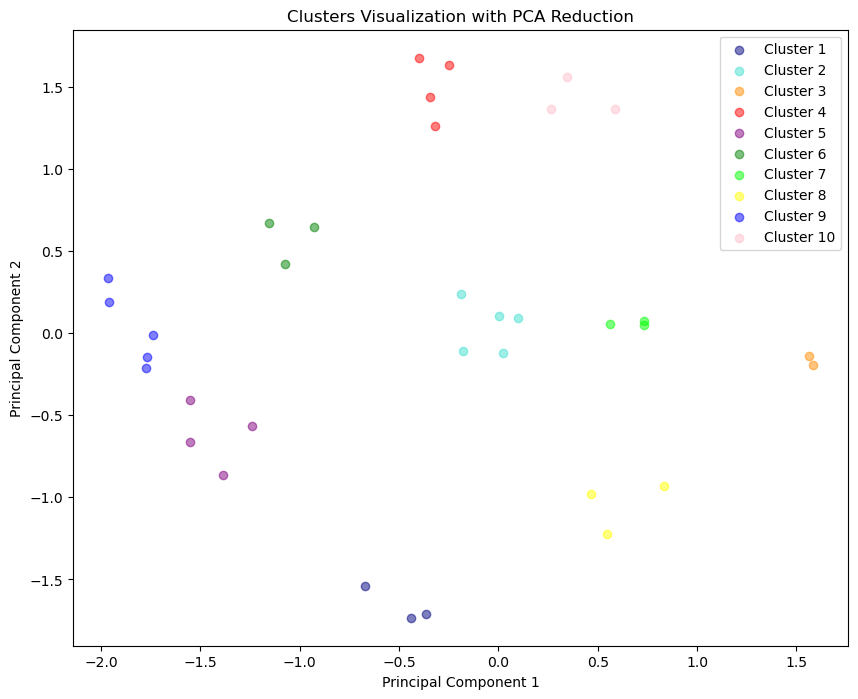

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans

# Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Clustering with the optimal number of clusters found
kmeans = MiniBatchKMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Visualization
plt.figure(figsize=(10, 8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'purple', 'green', 'lime', 'yellow', 'blue', 'pink']

# Assign a color to each cluster
for i, color in zip(range(optimal_clusters), colors):
    plt.scatter(X_pca[clusters == i, 0], X_pca[clusters == i, 1], color=color, alpha=0.5, 
                label=f'Cluster {i+1}')

plt.title('Clusters Visualization with PCA Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rarendale\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


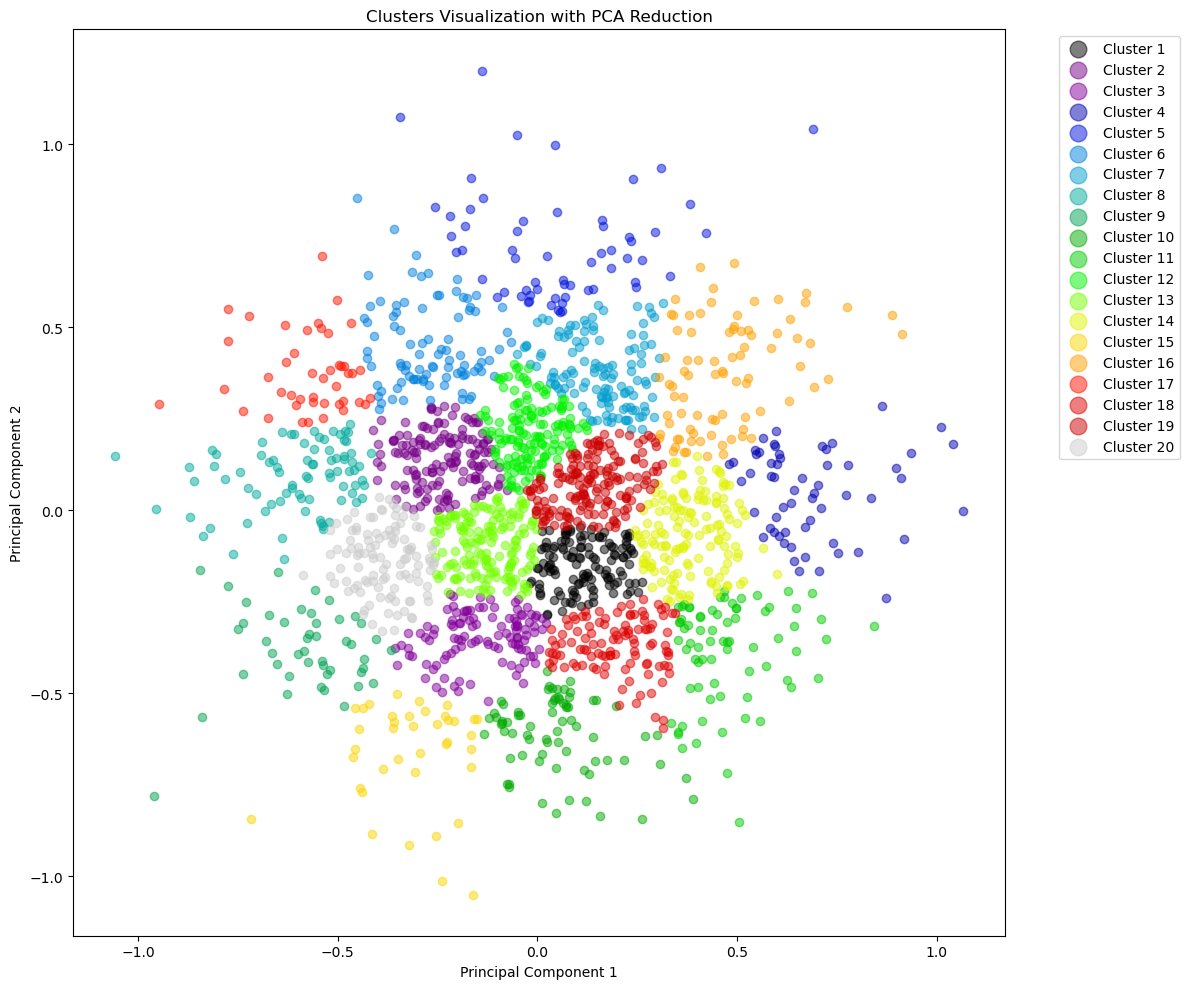

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
import numpy as np

# Assuming X_scaled is your scaled dataset
# Here, for demonstration, let's generate a synthetic dataset
np.random.seed(42)
num_samples = 2000  # Number of samples
num_features = 50   # Number of features per sample
X_scaled = np.random.rand(num_samples, num_features)

# Let's assume an optimal number of clusters has been identified (e.g., through silhouette score analysis)
optimal_clusters = 20

# Dimensionality Reduction with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Clustering with MiniBatchKMeans and the identified optimal number of clusters
kmeans = MiniBatchKMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Visualization
plt.figure(figsize=(12, 10))

# Generate a color for each cluster using a colormap
cmap = plt.get_cmap('nipy_spectral')
colors = cmap(np.linspace(0, 1, optimal_clusters))

# Plot each cluster with its respective color
for i, color in zip(range(optimal_clusters), colors):
    plt.scatter(X_pca[clusters == i, 0], X_pca[clusters == i, 1], color=color, alpha=0.5, label=f'Cluster {i+1}')

plt.title('Clusters Visualization with PCA Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Adjusting legend outside the plot
plt.legend(markerscale=2, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [28]:
import json
import pandas as pd


# Inspect the top-level keys in the loaded JSON to understand its structure
print(data.keys())

# If 'tracks' and 'items' are not the correct keys, adjust according to the actual structure.
# Assuming the structure is different, let's adapt based on your inspection.
# This is a placeholder step; replace 'correct_key' with the actual key(s) found in the JSON structure
tracks_data = data['correct_key']  # Adapt this line based on the JSON structure

# Proceed with converting the extracted data into a DataFrame
vetting_playlist_df = pd.json_normalize(tracks_data)

# Example feature names used during the original scaling and PCA transformation
# Replace these with the actual feature names from your dataset
feature_names = ['duration_ms', 'popularity', 'explicit']  # Example features

# Continue with the preprocessing and analysis as before...


dict_keys(['feature1', 'feature2'])


KeyError: 'correct_key'

In [32]:
import json
import pandas as pd


# Assuming the JSON structure was misunderstood and it directly contains the data
# without the 'tracks'->'items'->'track' nesting. Let's directly use the data.
try:
    # If the data is structured with direct features
    vetting_playlist_df = pd.DataFrame([data])  # When there's a single item or the structure is flat
except ValueError:
    # Handling potential errors or different structures
    print("The data structure does not match expected direct feature listings. Please verify the JSON structure.")

# Continue with your analysis or adjustments as needed
